# D209 Performance Assessment Task 2
## Darian Gurrola
## Course Instructor: Dr. Festus Elleh

## A1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The question I will pose for this analysis is "What factors contribute the most to customer tenure?".  We will answer this question using a random forest regression model.

## A2. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One of the goals of this analysis is to develop a random forest model to accurately predict the length of a customer's tenure with the telecommunications company.

## B1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Random forest is a supervised learning method that can be used to solve both classification and regression problems.  It works by constructing multiple decision trees at training time and outputting the mean or mode of predictions of the individual trees (Raj, 2020).  The premise behind random forest is that a collection of decision trees will provide more accurate predictions than a single tree.  The expected outcome of this analysis is to develop a a random forest model that can predict the length of a patient's initial hospital stay with reasonable accuracy.

## B2.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Random forest models utilize a technique called bootstrap aggregation.  Each decision tree in the random forest model in trained on a different subset of data, called a bag, and the results of each tree are aggregated to generate a prediction.  One of the assumptions about bootstrapping, which extends to random forest models, is that the samples used are representative of the population (Frost).  

## B3. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I used a variety of python libraries to develop and refine my random forest regression model.  I used pandas to import and manipulate the churn dataset.  Numpy was used to perform basic calculations during the data cleaning process.  Seaborn was used to generate data visualizations and explore the data.  Lastly, I imported a variety of methods from the Sklearn library to instantiate the random forest regression model, select the best feaures for the model, split the data, perform hyperparameter tuning, and calculate various performance metrics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, accuracy_score

## C1.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One of the preprocessing goals for this analysis is to clean the churn dataset.  This process will involve detecting and treating any duplicates, missing values, or outliers.  Data cleaning is required to produce consistent, structured, and accurate data for use in an analysis.  Failure to treat data quality issues could cause the regression model to produce misleading results and render any insights useless.  We must ensure that the data is reliable so that the model can achieve optimal accuracy.

## C2.  

The variables below will be used to perform the analysis. 

<ul>
    <li>Tenure - Numerical</li>
    <li>Population - Numerical</li>
    <li>Children - Numerical</li>
    <li>Age - Numerical</li>
    <li>Income - Numerical</li>
    <li>Outage_sec_perweek - Numerical</li>
    <li>Yearly_equip_failure - Numerical</li>
    <li>Techie - Categorical</li>
    <li>Contract - Categorical</li>
    <li>TechSupport - Categorical</li>
    <li>MonthlyCharge - Numerical</li>
    <li>Bandwidth_GB_Year - Numerical</li>
    <li>Item1 - Categorical</li>
    <li>Item2 - Categorical</li>
    <li>Item3 - Categorical</li>
    <li>Item4 - Categorical</li>
</ul>

## C3. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data preprocessing is a necessary element in developing a random forest model because it transforms the data in a way that makes it compatible with machine learning algorithms.  For this analysis, I took various steps to prepare the data and ensure an accurate model.  My approach was to import the initial data, explore the data using summary statistics, detect and treat any data quality issues, re-express categorical variables, select features for the model, and lastly, scale the data.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I imported the initial data by using the pandas "read_csv()" method on the "churn_clean.csv" file.  The data was assigned to a pandas dataframe called "df_churn".  I printed the first five rows and the data types of "df_churn" to understand what the data looks before any manipulation took place.

In [2]:
df_churn = pd.read_csv('churn_clean.csv')

In [3]:
df_churn.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After importing the initial csv file, I decided to explore the data.  For the categorical variables, I used the "value_counts()" method and multiplied by 100 to obtain percentages for each category.  I used the "describe()" method on numerical variables to obtain basic statistical information such as the mean and standard deviation.

In [4]:
#Describe dependent variable, Tenure
df_churn['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [5]:
df_churn["Tenure"].median()

35.430506995

In [6]:
#Describe independent variable, Population
df_churn['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [7]:
#Describe independent variable, Children
df_churn['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [8]:
#Describe independent variable, Age
df_churn['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [9]:
#Describe independent variable, Income
df_churn['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [10]:
#Describe independent variable, Outage_sec_perweek
df_churn['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [11]:
#Describe independent variable, Yearly_equip_failure
df_churn['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [12]:
#Describe dependent variable, Techie, using percentages for categories
df_churn['Techie'].value_counts(normalize = True) * 100 

No     83.21
Yes    16.79
Name: Techie, dtype: float64

In [13]:
#Describe dependent variable, Contract, using percentages for categories
df_churn['Contract'].value_counts(normalize = True) * 100 

Month-to-month    54.56
Two Year          24.42
One year          21.02
Name: Contract, dtype: float64

In [14]:
#Describe dependent variable, TechSupport, using percentages for categories
df_churn['TechSupport'].value_counts(normalize = True) * 100 

No     62.5
Yes    37.5
Name: TechSupport, dtype: float64

In [15]:
#Describe independent variable, Bandwidth_GB_Year
df_churn['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [16]:
#Describe dependent variable, Item1, using percentages for categories
df_churn['Item1'].value_counts(normalize = True) * 100 

3    34.48
4    33.58
2    13.93
5    13.59
1     2.24
6     1.99
7     0.19
Name: Item1, dtype: float64

In [17]:
#Describe dependent variable, Item2, using percentages for categories
df_churn['Item2'].value_counts(normalize = True) * 100 

3    34.15
4    34.12
5    13.68
2    13.60
1     2.17
6     2.15
7     0.13
Name: Item2, dtype: float64

In [18]:
#Describe dependent variable, Item3, using percentages for categories
df_churn['Item3'].value_counts(normalize = True) * 100 

3    34.35
4    34.10
2    14.24
5    13.13
6     2.03
1     2.02
7     0.12
8     0.01
Name: Item3, dtype: float64

In [19]:
#Describe dependent variable, Item4, using percentages for categories
df_churn['Item4'].value_counts(normalize = True) * 100 

4    34.52
3    34.30
2    13.50
5    13.35
1     2.21
6     2.03
7     0.09
Name: Item4, dtype: float64

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The next step in my preparation process was to detect and treat data quality issues such as duplicates, missing values, and outliers.  I detected duplicates by combining the "duplicated()" and "value_counts()” methods from the pandas library and using them on "df_churn".  The output indicated that there were no duplicate rows in the data.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I then moved on to detecting missing values in the data. To do this, I used the "isnull()" method from pandas and the "sum()" method on "df_churn".  The output showed that there were no missing values in the dataset.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I detected outliers in the data by generating boxplots for each of the quantitative variables.  This was done using the "boxplot()" function from the seaborn library.   In addition to the visualizations, I created a function called "boxplot_info()".  This function accepts a feature from df_churn as an input and provides key information such as the number of outliers and the range of outlier values.  The resulting output showed that there were outliers in "Population", "Children", "Income", "Outage_sec_perweek", and "Yearly_equip_failure".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After reviewing the boxplots for each numerical variable, I chose to retain all outliers.  This was because the values were plausible and in my opinion, not egregrious enough to exclude.  I also did not want to reduce the sample size or potentially introduce bias into the dataset. 

In [20]:
#Detect duplicate rows in df_churn 
print(df_churn.duplicated().value_counts())

False    10000
dtype: int64


In [21]:
#Detect missing values in df_churn
df_churn.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [22]:
#Create function to provide boxplot information
def boxplot_info(input):

    #obtain values of column and ignore nulls 
    data = input.dropna().values
    
    #calculate values of Q1 and Q3   
    q1 = input.quantile(0.25)
    print("Q1: " + str(q1))
    q3 = input.quantile(0.75)
    print("Q3: " + str(q3))
    
    #Calculate interquartile range for boxplot by subtracting Q1 from Q3
    iqr = q3 - q1
    print("IQR: " + str(iqr))
    
    #Calculate whisker values of boxplot. 
    whisker_lower = q1 - (1.5 * iqr)
    print("Lower Whisker: " + str(whisker_lower))
    whisker_upper = q3 + (1.5 * iqr)
    print("Upper Whisker: " + str(whisker_upper))
    
     #Find number of outliers outside of Q1 and Q3.  Print total number of outliers in column.  
    outliers_min = (input < whisker_lower).sum()
    print("Number of outliers lower than boxplot minimum: " + str(outliers_min))
    outliers_max = (input > whisker_upper).sum()
    print("Number of outliers greater than boxplot maximum: " + str(outliers_max))
    outliers_total = outliers_min + outliers_max
    print("Total number of Outliers: " + str(outliers_total))
    max_outlier = max(data)
    print("Maximum Value: " + str(max_outlier))
    min_outlier = min(data)
    print("Minimum Value: " + str(min_outlier))

Q1: 7.91769359175
Q3: 61.479795
IQR: 53.56210140825
Lower Whisker: -72.42545852062501
Upper Whisker: 141.822947112375
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Maximum Value: 71.99928
Minimum Value: 1.00025934


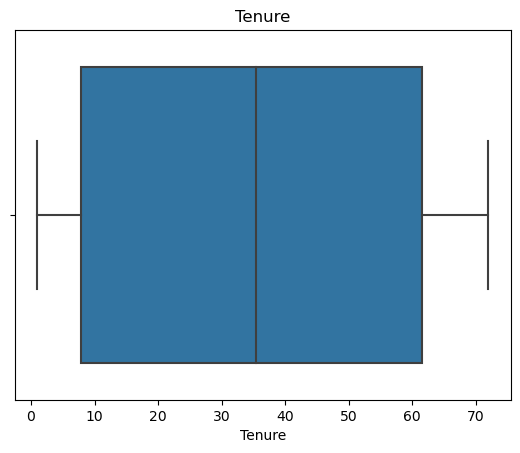

In [23]:
#Detect outliers in Tenure variable
population_boxplot = sns.boxplot(x="Tenure", data = df_churn).set_title("Tenure")

#Generate boxplot info for Tenure using boxplot_info function
boxplot_info(df_churn['Tenure'])

Q1: 738.0
Q3: 13168.0
IQR: 12430.0
Lower Whisker: -17907.0
Upper Whisker: 31813.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 937
Total number of Outliers: 937
Maximum Value: 111850
Minimum Value: 0


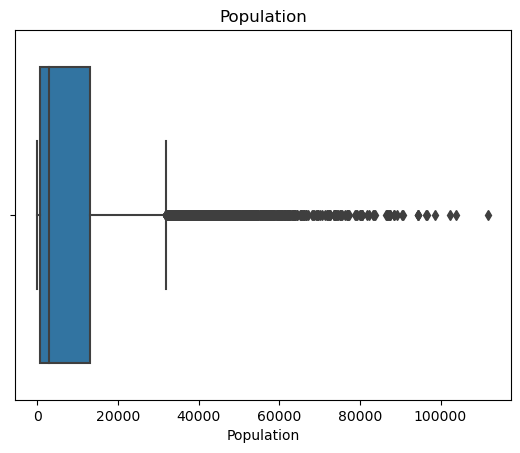

In [24]:
#Detect outliers in Population variable
population_boxplot = sns.boxplot(x="Population", data = df_churn).set_title("Population")

#Generate boxplot info for Population using boxplot_info function
boxplot_info(df_churn['Population'])

Q1: 0.0
Q3: 3.0
IQR: 3.0
Lower Whisker: -4.5
Upper Whisker: 7.5
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 401
Total number of Outliers: 401
Maximum Value: 10
Minimum Value: 0


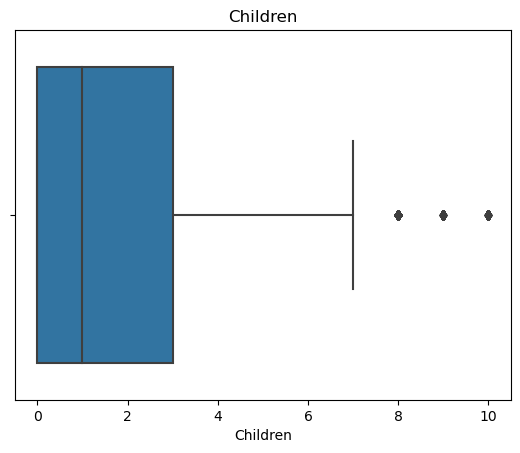

In [25]:
#Detect outliers in Children variable
population_boxplot = sns.boxplot(x="Children", data = df_churn).set_title("Children")

#Generate boxplot info for Children using boxplot_info function
boxplot_info(df_churn['Children'])

Q1: 35.0
Q3: 71.0
IQR: 36.0
Lower Whisker: -19.0
Upper Whisker: 125.0
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Maximum Value: 89
Minimum Value: 18


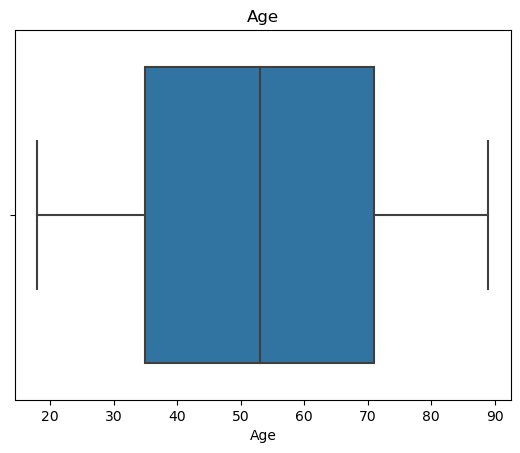

In [26]:
#Detect outliers in Age variable
population_boxplot = sns.boxplot(x="Age", data = df_churn).set_title("Age")

#Generate boxplot info for Population using boxplot_info function
boxplot_info(df_churn['Age'])

Q1: 19224.7175
Q3: 53246.17
IQR: 34021.4525
Lower Whisker: -31807.46125
Upper Whisker: 104278.34875
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 336
Total number of Outliers: 336
Maximum Value: 258900.7
Minimum Value: 348.67


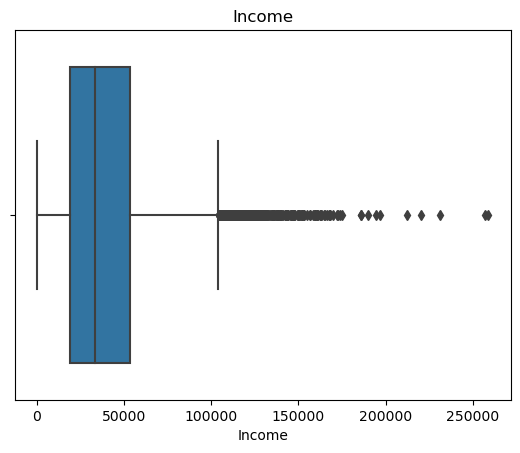

In [27]:
#Generate boxplot for Income variable
income_boxplot = sns.boxplot(x="Income", data = df_churn).set_title("Income")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Income'])

Q1: 8.018214
Q3: 11.969485
IQR: 3.951271
Lower Whisker: 2.0913075
Upper Whisker: 17.8963915
Number of outliers lower than boxplot minimum: 33
Number of outliers greater than boxplot maximum: 43
Total number of Outliers: 76
Maximum Value: 21.20723
Minimum Value: 0.09974694


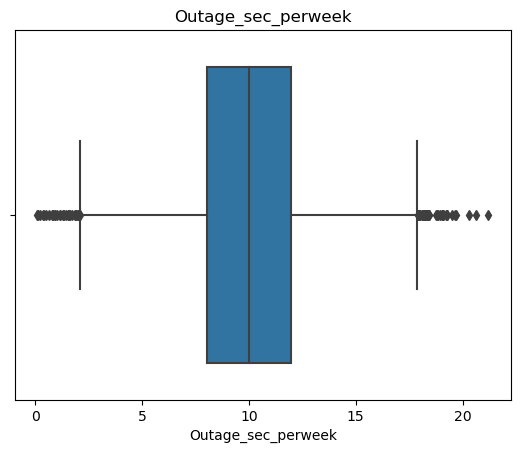

In [28]:
#Generate boxplot for Outage_sec_perweek variable
outage_boxplot = sns.boxplot(x="Outage_sec_perweek", data = df_churn).set_title("Outage_sec_perweek")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Outage_sec_perweek'])

Q1: 0.0
Q3: 1.0
IQR: 1.0
Lower Whisker: -1.5
Upper Whisker: 2.5
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 94
Total number of Outliers: 94
Maximum Value: 6
Minimum Value: 0


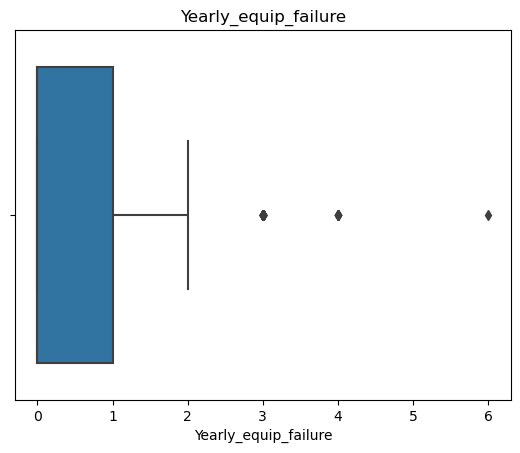

In [29]:
#Generate boxplot for Yearly_equip_failure variable
email_boxplot = sns.boxplot(x="Yearly_equip_failure", data = df_churn).set_title("Yearly_equip_failure")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Yearly_equip_failure'])

Q1: 139.979239
Q3: 200.734725
IQR: 60.75548599999999
Lower Whisker: 48.84601000000002
Upper Whisker: 291.867954
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Maximum Value: 290.160419
Minimum Value: 79.97886


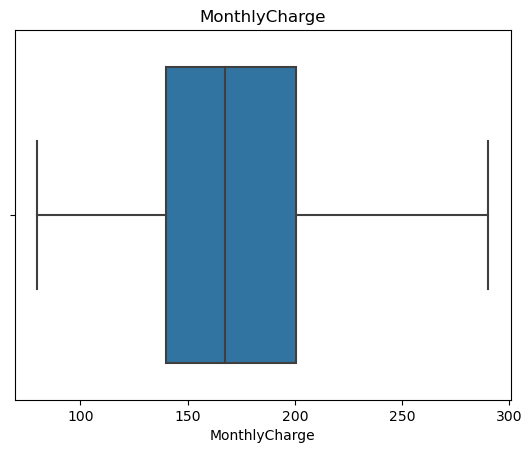

In [30]:
#Generate boxplot for MonthlyCharge variable
email_boxplot = sns.boxplot(x="MonthlyCharge", data = df_churn).set_title("MonthlyCharge")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['MonthlyCharge'])

Q1: 1236.470827
Q3: 5586.1413695
IQR: 4349.6705425
Lower Whisker: -5288.03498675
Upper Whisker: 12110.64718325
Number of outliers lower than boxplot minimum: 0
Number of outliers greater than boxplot maximum: 0
Total number of Outliers: 0
Maximum Value: 7158.98153
Minimum Value: 155.5067148


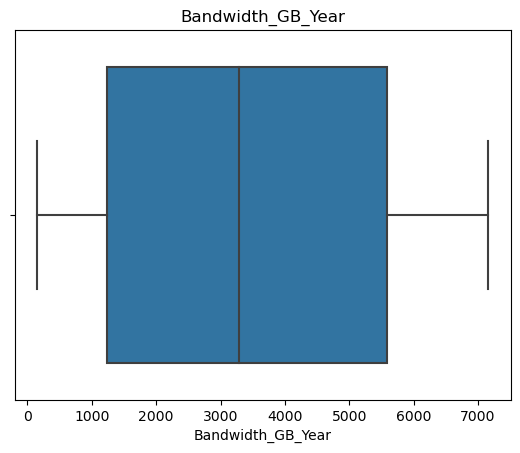

In [31]:
#Generate boxplot for Bandwidth_GB_Year variable
email_boxplot = sns.boxplot(x="Bandwidth_GB_Year", data = df_churn).set_title("Bandwidth_GB_Year")

#Generate boxplot info using boxplot_info() function
boxplot_info(df_churn['Bandwidth_GB_Year'])

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Following the data cleaning step, I decided to re-express my categorical variables numerically.  This was necessary to ensure compatability with the random forest model.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To re-express the variables "Techie", and "TechSupport", I used ordinal encoding.  This was done because these variables only have the values of "Yes" and "No", which can be reinterpreted as 1 and 0.  I started off by creating a unique dictionary for each variable.  I created "dict_techie" for "Techie", and "dict_techsupport" for "TechSupport".  Each dictionary assigns a value of 1 to "Yes" and 0 to "No".  I then used the "replace()" method from pandas on df_churn and passed the dictionaries as parameters.  This replaced the existing "Yes" and "No" values with 1 and 0, respectively.  I then printed the unique values of "Techie", and "TechSupport" to confirm they had been successfully re-expressed numerically.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I chose to re-express the variable "Contract" using one-hot encoding.  This was done because its values represent labels rather than a particular order.  To perform one-hot encoding, I used the "get_dummies()" method from pandas on "Contract", which created a new dataframe containing the dummy variables. The resulting dataframe, "df_contract", contains the dummy variables "Contract_month-to-month", "Contract_One year", and "Contract_Two Year".  Because the dummy variables contained boolean values, I used the "astype()" method to change them to integers (1 and 0).  The last step I took was to join "df_contract" back to df_churn. 

In [32]:
#Re-express Techie as numeric using ordinal encoding

#Find unique values of  variable
print(df_churn["Techie"].unique())

#Create dictionary to store numeric values for variable
dict_techie = {"Techie":
                    {"Yes":1,
                     "No":0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_techie, inplace=True)

#Confirm categorical values have been replaced
print(df_churn["Techie"].unique())

['No' 'Yes']
[0 1]


In [34]:
#Re-express TechSupport as numeric using ordinal encoding

#Find unique values of  variable
print(df_churn["TechSupport"].unique())

#Create dictionary to store numeric values for variable
dict_techsupport = {"TechSupport":
                    {"Yes":1,
                     "No":0,
                    }
                }

#Replace categorical values with numeric values from dictionary
df_churn.replace(dict_techsupport, inplace=True)

#Confirm categorical values have been replaced
print(df_churn["TechSupport"].unique())

['No' 'Yes']
[0 1]


In [33]:
#Re-express Contract as numeric using one-hot encoding

#Print unique values of Contract
print(df_churn["Contract"].unique())

#Use pd.get_dummies to turn Contract variable into 3 dummy variables
df_contract = pd.get_dummies(df_churn["Contract"], prefix="Contract")

#Change data type of dummy variables from boolean to float
df_contract = df_contract.astype(int)

#Join dummy variables to df_churn
print(df_contract)
df_churn = df_churn.join(df_contract)

['One year' 'Month-to-month' 'Two Year']
      Contract_Month-to-month  Contract_One year  Contract_Two Year
0                           0                  1                  0
1                           1                  0                  0
2                           0                  0                  1
3                           0                  0                  1
4                           1                  0                  0
...                       ...                ...                ...
9995                        1                  0                  0
9996                        0                  0                  1
9997                        1                  0                  0
9998                        0                  0                  1
9999                        1                  0                  0

[10000 rows x 3 columns]


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After re-expressing my categorical variables I decided to rename some of them to make them more consistent and easier to interpret.  I did this by using the "rename()" method on "df_churn".  "Contract_Month-to-month" was renamed "Contract_Monthly".  "Contract_One year" was renamed "Contract_One_Year".  "Contract_Two Year" was renamed "Contract_Two_Year".  Lastly, "Item1", "Item2", "Item3", and "Item4" were renamed "Responses", "Fixes", "Replacements", and "Reliability".

In [35]:
#Rename Item columns in df_churn 
df_churn = df_churn.rename(columns = {"Contract_Month-to-month":"Contract_Monthly","Contract_One year":"Contract_One_Year","Contract_Two Year":"Contract_Two_Year","Item1":"Responses","Item2":"Fixes","Item3":"Replacements","Item4":"Reliability"})

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Next, I decided to check for correlation between my independent variables.  To do this, I divided my quantitative and qualitative variables into separate groups generated heatmaps for both groups using the seaborn "heatmap()" method.  I decided that I would remove any variable with a pearson coefficient of less than -0.7 or greater than 0.7.  Based on the results of the heatmap, I did not remove any variables.

<Axes: >

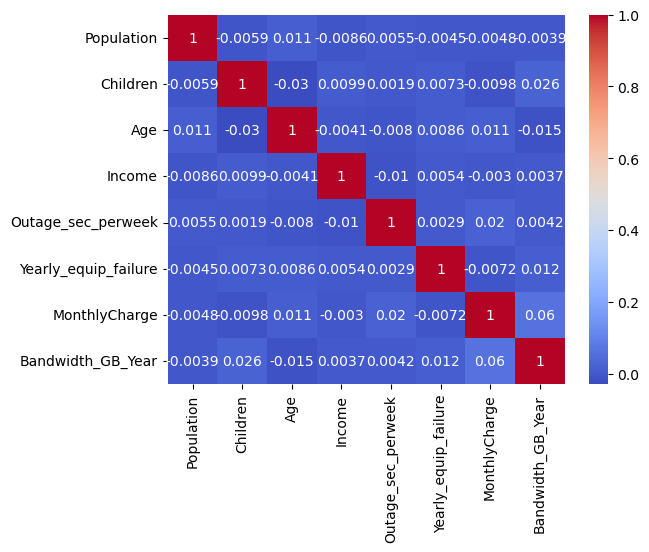

In [36]:
#Check for correlation between quantitative variables
sns.heatmap(data=df_churn[["Population","Children","Age","Income","Outage_sec_perweek","Yearly_equip_failure","MonthlyCharge","Bandwidth_GB_Year"]].corr(),annot=True, cmap="coolwarm")

<Axes: >

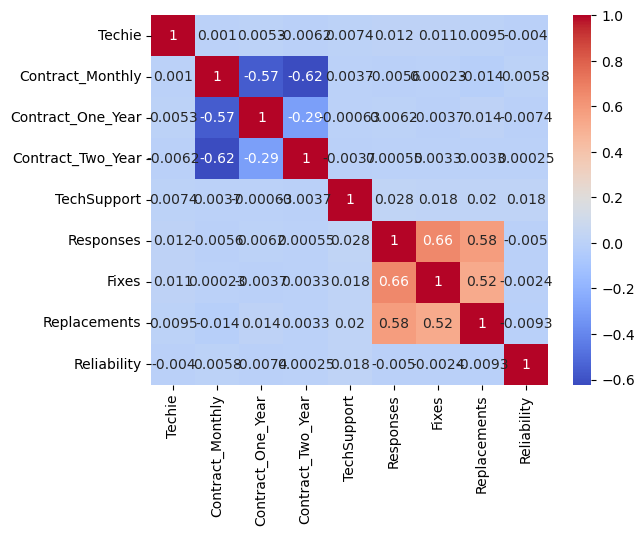

In [37]:
#Check for correlation between qualitative variables
sns.heatmap(data=df_churn[["Techie","Contract_Monthly","Contract_One_Year","Contract_Two_Year","TechSupport","Responses","Fixes","Replacements","Reliability"]].corr(),annot=True, cmap="coolwarm")

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After checking for correlation between independent variables, I moved onto the feature selection step of my preprocessing plan.  I assigned all of my selected independent variables to a variable called "X", and my response variable "Tenure" to a variable called "y".  I then used the "SelectKBest()" method from scikit-learn to select the best features.  I passed "f_classif" as the scoring function to score the variables based their ANOVA f-value.  I then fit and transformed the "SelectKBest()" method around my variables.  I ultimately chose to keep statistically significant features with p-values less than 0.05.  This left me with the variables "Bandwidth_GB_Year", "Fixes", and "Population". 

In [38]:
#Assign independent variables to X, and dependent variable to y
X = df_churn[["Population","Children","Age","Income","Outage_sec_perweek","Yearly_equip_failure","MonthlyCharge","Bandwidth_GB_Year","Techie","Contract_Monthly","Contract_One_Year","Contract_Two_Year","TechSupport","Responses","Fixes","Replacements","Reliability"]]
y = df_churn["Tenure"]

#Use SelectKBest method to determine most statistically significant features for model
feature_names = X.columns
skbest = SelectKBest(score_func=f_classif, k='all')
X_new = skbest.fit_transform(X, y)

#Keep features with p-value < .05 and assign to variable "features_to_keep"
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value'] < .05]

,Feature,p_value
7,Bandwidth_GB_Year,0.000089
14,Fixes,0.023362
0,Population,0.045983


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After determining the best features for the model, I assigned the variables "Tenure", "Bandwidth_GB_Year", "Fixes" and "Population" to a dataframe called "churn_preprocessed".

In [39]:
churn_preprocessed = pd.DataFrame(data=df_churn, columns=["Tenure","Bandwidth_GB_Year","Fixes","Population"])

## C4. 

I have attached a copy of my cleaned data in a file called "churn_preprocessed.csv".

In [40]:
#Export to csv file
churn_preprocessed.to_csv("churn_preprocessed.csv")

## D1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that the data has been preprocessed, it is ready to be split into testing and training subsets.  I started by assigning the independent features to a variable called "X", and the dependent variable to "Y".  I then used the "train_test_split()" method from scikit-learn and passed "X" and "Y" as parameters.  I chose to split the data into 80% training and 20% testing subsets.  The subsets have been exported to the files "X_train.csv", "Y_train.csv", "X_test.csv", and "Y_test.csv".

In [41]:
#Assign independent variables to X and dependent variable to Y
X = churn_preprocessed[["Bandwidth_GB_Year","Fixes","Population"]]
Y = churn_preprocessed["Tenure"]

#Split data using the train_test_split method
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size=0.2, random_state=15)

#Export train and test data to respective .csv files
X_train.to_csv("X_train.csv")
Y_train.to_csv("Y_train.csv")
X_test.to_csv("X_test.csv")
Y_test.to_csv("Y_test.csv")

## D2. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;With the data now processed and split, I was now ready to begin the analysis.  I would like to note that there were no intermediate calculations used for this portion.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I started off by assigning my training data for the "Tenure" to a one-dimensional array.  This was done to make the data compatible with the random forest model.  To do this, I used the "ravel()" method from numpy on "Y_train" and assigned the array to the variable "rfy".  I then instantiated the model by using the "RandomForestRegressor()" method from sklearn and fitting it to my training data.  The output was assigned to the variable "rfr".  I used "X_train" and "rfy" as parameters.  To generate predictions from the model, I used the sklearn "predict()" method on "X_test" and assigned the output to y_pred.

In [42]:
#Format response values as one-dimensional array 
rfy = np.ravel(Y_train)

#Instantiate RandomForestRegression using training data
rfr = RandomForestRegressor().fit(X_train, rfy)

#Generate predictions using Test Data
y_pred = rfr.predict(X_test)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; After instantiating the model, it was time to perform hyperparameter tuning.  I started off by creating a parameter grid which contained unique values for the parameters "n_estimators", "max_features", and "max_depth".  The parameter grid was called "param_grid".

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The parameter "n_estimators" contains the values 10, 50, and 100.  It represents the possible number of decision trees to be used in the random forest model (Scikit-learn documentation).  The "max_features" parameter contains the values 2 and 3.  It represents the the number of features to consider when splitting a node.  The final parameter, "max_depth", contains the values 8 and "None".  It represents the maximum depth of the trees. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After selecting the parameters I wanted to optimize, I used the "make_scorer()" method and assigned "mean_squared_error" as a parameter.  This was so that the random forest model would provide a best score best on the mean squared error metric.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;I then used the "GridSearchCV" method and passed "rfr" and "param_grid" as parameters.  I also specified a value of 10 for "cv" in order to perform 10-fold cross-validation.  The resulting output was assigned to the variable "rfrcv".  I used the "fit()" method to fit "rfrcv" on the training data and printed the best parameters, mean squared error, root-mean-square deviation, and R-squared score.  The results show that the optimal max depth is "None", the optimal number of features is 3, and the optimal number of estimators is 10.  We can also see that the MSE is 11.4613, the RMSE is 3.3855, and the R-squared score is 0.9972.

In [43]:
#In-text citation: [D209 T2 Building RF in R Churn Data]

#Create parameter grid
param_grid = {
    "n_estimators": [10,50,100],
    "max_features": [2,3],
    "max_depth": [8, None]
}

#Set scorer to mean squared error
scorer = make_scorer(mean_squared_error)

#Perform hyperparameter tuning with 10 fold cross validation
rfrcv = GridSearchCV(rfr, param_grid, cv=10, scoring = scorer)
rfrcv.fit(X_train, Y_train)

#Print best parameters and best score for top performing model
print("Best Parameters: ", rfrcv.best_params_)
print("Training Score (MSE): ", rfrcv.best_score_)
print("Training Score (RMSE): ", (rfrcv.best_score_)**(1/2))
Y_train_pred = rfrcv.predict(X_train)
print("Training - R-Squared Score for the model: ", r2_score(Y_train, Y_train_pred))

Best Parameters:  {'max_depth': None, 'max_features': 3, 'n_estimators': 10}
Training Score (MSE):  11.461299725258945
Training Score (RMSE):  3.385454138702656
Training - R-Squared Score for the model:  0.997229305918298


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that the model has been completed, I wanted to revisit the question posed at the beginning of the anaysis.  To determine the most important factors in predicting tenure, I first obtained the importances of each feature using the "best_estimator_" and "feature_importances_" attributes and assigned the values to a pandas series called "importances".  I then sorted the values from largest to smallest using the "sort_values()" method from pandas. After plotting the values, we can see that the "Bandwidth_GB_Year" is by far the most important feature.

Text(0.5, 1.0, 'Feature Importances')

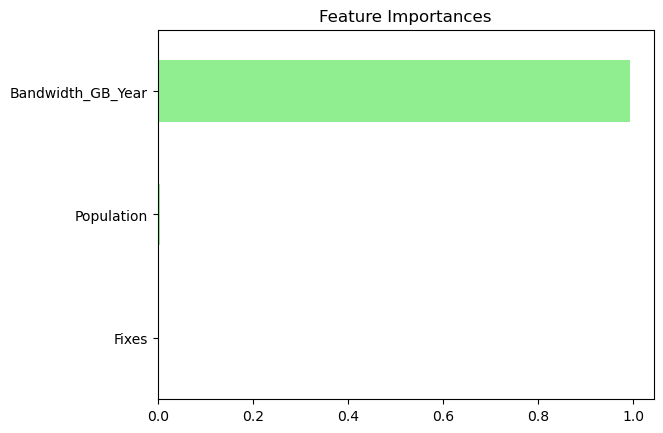

In [44]:
#Determine which features were the most important in predicting Tenure

#Create a pd.Series of feature importances 
importances = pd.Series(data=rfrcv.best_estimator_.feature_importances_, index = X_train.columns)

#Sort importances
importances_sorted = importances.sort_values()

#Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind="barh", color="lightgreen")
plt.title("Feature Importances")

In [45]:
print(importances)

Bandwidth_GB_Year    0.993064
Fixes                0.001440
Population           0.005496
dtype: float64


## D3.  

This section contains the same code used for the analysis in D2. 

In [42]:
#Format response values as one-dimensional array 
rfy = np.ravel(Y_train)

#Instantiate RandomForestRegression using training data
rfr = RandomForestRegressor().fit(X_train, rfy)

#Generate predictions using Test Data
y_pred = rfr.predict(X_test)

In [43]:
#In-text citation: [D209 T2 Building RF in R Churn Data]

param_grid = {
    "n_estimators": [10,50,100],
    "max_features": [2,3],
    "max_depth": [8, None]
}

#Set scorer to mean squared error
scorer = make_scorer(mean_squared_error)

#Perform hyperparameter tuning with 10 fold cross validation
rfrcv = GridSearchCV(rfr, param_grid, cv=10, scoring = scorer)
rfrcv.fit(X_train, Y_train)

#Print best parameters and best score for top performing model
print("Best Parameters: ", rfrcv.best_params_)
print("Training Score (MSE): ", rfrcv.best_score_)
print("Training Score (RMSE): ", (rfrcv.best_score_)**(1/2))
Y_train_pred = rfrcv.predict(X_train)
print("Training - R-Squared Score for the model: ", r2_score(Y_train, Y_train_pred))

Best Parameters:  {'max_depth': None, 'max_features': 3, 'n_estimators': 10}
Training Score (MSE):  11.461299725258945
Training Score (RMSE):  3.385454138702656
Training - R-Squared Score for the model:  0.997229305918298


Text(0.5, 1.0, 'Feature Importances')

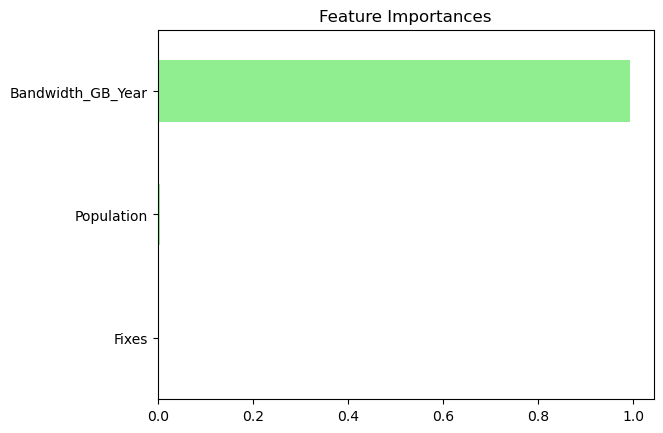

In [44]:
#Determine which features were the most important in predicting Tenure

#Create a pd.Series of feature importances 
importances = pd.Series(data=rfrcv.best_estimator_.feature_importances_, index = X_train.columns)

#Sort importances
importances_sorted = importances.sort_values()

#Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind="barh", color="lightgreen")
plt.title("Feature Importances")

In [45]:
print(importances)

Bandwidth_GB_Year    0.993064
Fixes                0.001440
Population           0.005496
dtype: float64


## E1. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One of the main metrics for measuring the performance of a random forest model is mean squared error.  It is the average squared difference between observed and predicted values, and essentially measures the amount of error in statistical models. After instantiating the random forest regression model and performing hyperparameter tuning, my model achieved a mean squared error of 11.4613.  The square root of the MSE is the RMSE, which measures the average difference between values predicted by a model and the actual values (Beheshti, 2022).  The RMSE of the model was 3.3855. This means that the average difference between the predicted and actual tenure values were 3.3855 months.  In the next section, I will go into greater detail regarding the implications of these values.

## E2. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As mentioned previously, the random forest model has an MSE of 11.4613.  To get a better idea of the accuracy, however, we can compare the RMSE to the values of "Tenure" which were explored at the beginning of the analysis.  "Tenure" has a median value of 35.4305, a minimum of 1, and a maximum of 72.   Based on this information, it seems that this model does a relatively good job of predicting tenure length.  The average difference between predicted and actual customer tenure is only about 3.3855 months.  When viewed in cotext, the results of the analysis imply that the model is reasonably accurate.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The model also fares quite well with respect to the R-squared.  A value of 0.9972 indicates that the independent variables used in the analysis explain about 99.72% of the variability in the response variable.  Considering that the maximum possible value for R-squared is 1, we can interpret this to mean that the model demonstrates a very high goodness of fit (Frost).  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One thing that stuck out during the analysis was the relatively small amount of remaining variables after using the "SelectKBest()" method.  The only variables with a p-value less than 0.05 were "Bandwidth_GB_Year", "Population", and "Fixes".  Hyperparameter tuning reduced the maximum number of features to three, and of those three "Bandwidth_GB_Year" dominated the prediction calculations based on importance.  It appears that the entire model is reliant on on single feature.  

## E3. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A notable limitation of random forest regression is that the range of predictions a model can make is bound by the highest and lowest values in the training data.  This can pose a problem if the testing and training data have significantly different values.  This problem is called covariate shift, and it is a particularly big issue with random forest models (Thompson, 2019).  The model may have underestimated or overestimated tenure length depending on the data that was used to train it.  

## E4.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Based on the results and implications discussed earlier, the model does appear to be reasonably accurate in predicting customer tenure.  It also fits the fits the data very well.  The previous discussion of MSE, RSE, and R-squared outputs support this conclusion.  I will note, however, that there is room for improvement.  Additional hyperparameter tuning could reduce the MSE and RMSE further, which would indicate an even more accurate model.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;When looking at feature importance, it appears that the only variable that has a strong influence on tenure is "Bandwidth_GB_Year".  This indicates that customers who use more data typically have a longer relationship with the telecommunications provider.  Perhaps it would be a good idea for the company to do some market research and determine which demographics use the most data.  Considering that the company already offers television and movie streaming, it might be worthwhile to develop some sort of service offering for online gaming.   I would also recommend that the telecommunications company collect data on a wider range of variables.  External data on what competitor servicers customers are using could provide some useful insights.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lastly, I would recommend performing a different type of analysis such as lasso or ridge regression.  These methods might be able to provide even more accurate accurate results.  Random forest models are just one method the company has at its disposal and it wouldn't hurt to explore other options.

## F. 

Please see the link below for the panopto recording.

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3f3b7304-2ca7-478d-8a38-b12c0025a53d

## G. 

Elleh, F. (Narrator). D209 T2 Building RF in R Churn Data [Online video]. https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=73d810af-b7f7-4ac6-ac4e-b11b00f4384a

## H. 

Raj, A. (2020, June 18). A Quick and Dirty Guide to Random Forest Regression. Towards Data Science. https://towardsdatascience.com/a-quick-and-dirty-guide-to-random-forest-regression-52ca0af157f8

Frost, J. (n.d.). Introduction to Bootstrapping in Statistics with an Example. Statistics by Jim. https://statisticsbyjim.com/hypothesis-testing/bootstrapping/

sklearn.ensemble.RandomForestRegressor¶. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Thompson, B. (2019, December 17). A limitation of Random Forest Regression. Towards Data Science. https://towardsdatascience.com/a-limitation-of-random-forest-regression-db8ed7419e9f

Beheshti, N. (2022, March 2). Random Forest Regression. Towards Data Science. https://towardsdatascience.com/random-forest-regression-5f605132d19d

Frost, J. (n.d.). How To Interpret R-squared in Regression Analysis. Statistics by Jim. https://statisticsbyjim.com/regression/interpret-r-squared-regression/